# Esercitazione su Equazioni e Minimizzazione

## Esercizio 1 - Minimizzazione

### Massa Invariante

Secondo la teoria della Relatività Ristretta il il modulo del quadrimpuso è una invariante per trasformazioni di Lorentz:

$$
m c^2 = \sqrt{ E^2 - \left(p_x^2 + p_y^2 + p_z^2 \right)}
$$


Nel caso di un decadimento si può calcolare la massa invariante della particella decaduta a partire dai prodotti di decadimento.

Per un decadimento a due corpi abbiamo:

$$
m c^2 = \sqrt{ \left(E_1+E_2\right)^2 - \left( \left(p_{x_1} + p_{x_2}\right)^2 + \left(p_{y_1} + p_{y_2}\right)^2 + \left(p_{z_1} + p_{z_2}\right)^2 \right)}
$$

### Dati

Per questa esercitazione useremo dati pubblici messi a disposizione dal CERN.

Alcuni link correlati:
* https://github.com/cms-opendata-analyses/HiggsExample20112012/tree/master
* https://opendata.cern.ch/record/5101

CERN Open Data: https://opendata.cern.ch/ 

In particolare useremo dei dati dell'esperimento _CMS_ che riguradano il decadimento $J/\psi \rightarrow \mu \mu$ messi a disposizione in formato `CSV`:

http://opendata.cern.ch/record/5203/files/Jpsimumu.csv


il quale contiene informazione su una selezione di eventi in cui due muoni sembrano formare un vertice di diecadimento.

In [1]:
# Import 
import pandas as pd
import numpy as np

In [2]:
# Esempio accesso dati

# J/Psi 
dataset = pd.read_csv('http://opendata.cern.ch/record/5203/files/Jpsimumu.csv')

In [3]:
dataset

,Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2
0,165617,75206813,G,10.1623,0.4763,-8.5164,5.5231,8.5297,0.6091,-1.5149,-1,G,19.7754,2.7508,-13.9871,13.7059,14.2550,0.8539,-1.3766,1
1,165617,75678475,G,15.8799,15.0618,-1.6658,-4.7464,15.1536,-0.3083,-0.1102,1,G,11.9338,11.9084,-0.7670,-0.0851,11.9330,-0.0071,-0.0643,-1
2,165617,74428554,G,21.8279,-6.2214,11.0845,17.7447,12.7111,1.1357,2.0823,-1,G,36.6513,-10.6874,15.0692,31.6544,18.4743,1.3076,2.1877,1
3,165617,75193169,G,19.4923,2.7612,-5.5769,-18.4719,6.2230,-1.8084,-1.1111,1,G,14.9334,1.5525,-6.1254,-13.5302,6.3190,-1.5050,-1.3226,-1
4,165617,74832715,G,8.0972,4.6127,-1.8389,6.3949,4.9657,1.0710,-0.3793,-1,T,3.5131,-0.5305,0.6880,3.4024,0.8688,2.0742,2.2276,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,163796,127190648,G,20.3600,9.1811,7.6371,-16.4894,11.9423,-1.1267,0.6939,-1,G,8.1878,4.2811,4.4597,-5.3678,6.1819,-0.7851,0.8058,1
19996,163796,127218144,G,11.4697,-1.6944,6.4898,-9.3035,6.7073,-1.1304,1.8262,-1,G,12.0051,-2.2652,9.0200,-7.5908,9.3001,-0.7453,1.8168,1
19997,163796,127418342,G,7.8173,4.7081,-4.8603,-3.9128,6.7668,-0.5501,-0.8013,1,G,10.7875,7.8230,-3.5396,-6.5291,8.5865,-0.7014,-0.4249,-1
19998,163796,127439838,G,11.2399,-8.7510,-5.7406,-4.0975,10.4658,-0.3821,-2.5610,1,G,17.7455,-12.2635,-11.9949,-4.5412,17.1543,-0.2617,-2.3673,-1


In particolare le variabili di nostro interesse sono:
* l'energia dei due muoni: **E1**, **E2**;
* le componenti della quantità di moto dei due muoni: (**px1**, **py1**, **pz1**), (**px2**, **py2**, **pz2**).


###  Richieste

#### Fase preliminare 
Creare uno script python che:
1. legga il file di dati indicato sopra e crei il corrispettivo DataFrame _pandas_;
2. calcoli la massa invariante per ogni evento;
3. produca un istogramma della massa invariante calcolata;
3. produca un istogramma della massa invariante in un intervallo ristretto attorno al picco più alto;
    * SUGGERIMENTO: selezionare l'intervallo in modo tale da lasciare del margine attorno al picco in cui sia apprezzabile il livello di fondo;

#### Fit con Gaussiana singola
Modificare lo script in moto tale che:
1. definisca una funzione di fit ($f_{g1}$) corrispondnete ad una funzoine di Gaus + una polinomiale di primo grado;
2. esegua il fit dei dati attorno al picco principale con la funzione $f_{g1}$;
3. produca un grafico che mostri:
    * la funzione di fit ottimizzata sovrapposta ai dati;
    * lo scarto fra dati e fit (in un pannello separato);
    * opzionale: lo scarto fra dati e fit diviso per l'errore (in un ulteriore pannello separato);
4. stampi il valore dei parametri del fit e del $\chi^2$;

Valutare i risultati sia graficamente che quantitativamente;

#### Fit con Gaussiana doppia
Modificare lo script in moto tale che:
1. definisca una seconda funzione di fit ($f_{g2}$) corrispondnete alla somma di due funzoini di Gaus con stessa media ma diversa sigma e normalizzazione + una polinomiale di primo grado;
2. ripeta i passi 2,3 e 4 del punto precedente anche per $f_{g2}$.

#### Opzionale
Ripetere l'analisi per il picco a più alta energia. Di che particella potrebbe trattarsi?

https://pdglive.lbl.gov/ParticleGroup.action?init=0&node=MXXX025

### _Formule Funzioni di Fit_

$$
f_{g1}(x) = A \; e^{-\frac{\left(x -  m \right)^2}{2 \sigma^2}} + p_1 x + p_0 
$$


$$
f_{g2}(x) = A_1 \; e^{-\frac{\left(x -  m \right)^2}{2 \sigma_1^2}} + A_2 \; e^{-\frac{\left(x -  m \right)^2}{2 \sigma_2^2}} + p_1 x + p_0 
$$

### Particle Data Group

$J/\psi$:
* https://pdglive.lbl.gov/Particle.action?init=0&node=M070&home=MXXX025
* https://pdg.lbl.gov/2023/listings/rpp2023-list-J-psi-1S.pdf

### Rivoluzione di Novembre

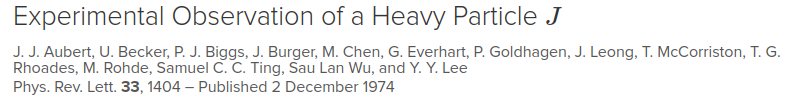

https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.33.1404?utm_source=article-collection&utm_medium=web&utm_campaign=1974

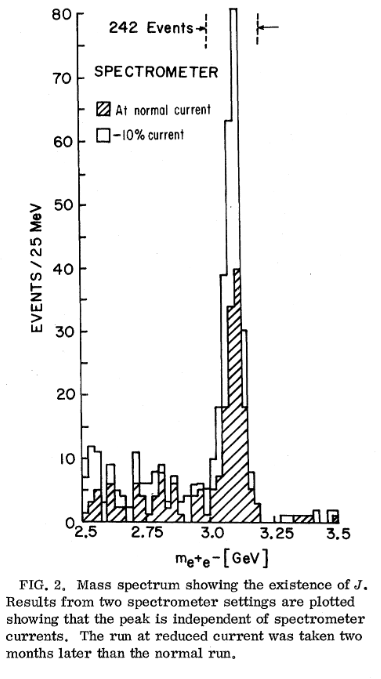

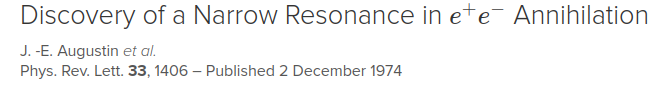

https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.33.1406?utm_source=article-collection&utm_medium=web&utm_campaign=1974

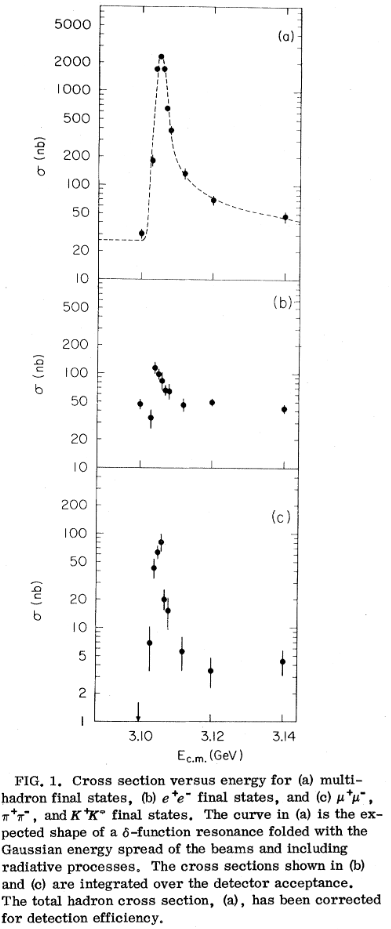